## Can a vanilla multi-layer perceptron (MLP) learn the XOR gate?

The target architecture is:
<!-- ![MLP](media/MLPxorTopology.png) -->
<img src="media/MLPxorTopology.png" alt="Drawing" style="width: 500px;"/>


This is an important point I am about to make, as it leads to alot of confusion regarded where and why the bias is introduced:

With shallow models, you inject the bias term into the data matrix, giving you your [design matrix](https://en.wikipedia.org/wiki/Design_matrix). In the first notebook (linearly-separable-spaces.ipynb), we were working with a shallow model and hence introduced the bias column. 

When preparing data for a deep model, the biases are added **after** the input layer, and are present on the target node(s). This is just a convention. You could shift all the biases back, such that there is one present for each input node (building the design matrix), but not present on the output node.

Hence the XOR gate input matrix becomes:

\begin{equation}
X = \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & 0 & 0 \end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 1 \\
1 & 0 \\
0 & 1 \\
0 & 0  \end{bmatrix}, 
y_{xor} = \begin{bmatrix}
0 \\
1 \\
1 \\
0  \end{bmatrix}
\end{equation}

## Interlude
You dont normally have to define the optimisation routine manually, like I am about to. But it is good to see how the optimisation process unfolds, hence I am doing it using numpy below. 

Let:
\begin{equation}
z^{l} = (a^{l-1})^\intercal W^{l} + b^{l}
\end{equation}
and 
\begin{equation}
a^{l} = \phi(z^{l})
\end{equation}
describe non-linear operation making up the $l^{th}$ layer in a feed forward, fully connect, neural network. 
Let 
\begin{equation}
z^{l}
\end{equation}
be the pre-activation output of the $l^{th}$ layer. That is, before applying a non-linear function to it; $\phi$.  
\begin{equation}
\phi
\end{equation}
and be the activation function. Below we will use the [Rectified linear unit](https://en.wikipedia.org/wiki/Activation_function), whos derivative is the  [Heavyside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)
\begin{equation}
b^{l}
\end{equation}
and the bias vector of the $l^{th}$ layer 
\begin{equation}
W^{l}
\end{equation}
the weight matrix of the $l^{th}$ layer

# Back propagation

Let the _error_ of $j^{th}$ neuron in the $l^{th}$ layer denoted as: 
\begin{equation}
\Delta^{l}_{j} 
\end{equation}
And defined by the **change in the loss function J** w.r.t the neuron's weighted input
\begin{equation}
\Delta^{l}_{j} =  \frac{\partial{J}}{\partial z_{j}^{l}} 
\end{equation}
The cost function, $J$, is implicitly a function of the neuron's weighted input,since before producing a change in $J$, we apply $\phi$ to produce $a$, the activation:
\begin{equation}
\frac{\partial{J}}{\partial z_{j}^{l}}  = \frac{\partial{J}}{\partial a_{j}^{l}} \frac{\partial{a_{j}^{l}}}{\partial z_{j}^{l}} 
\end{equation}
The partial derivative of activation function, $a$, w.r.t its input $z$ is: 
\begin{equation}
\frac{\partial{a_{j}^{l}}}{\partial z_{j}^{l}} = \phi'{^l}(z_{j}^{l})
\end{equation}
putting it together: 

\begin{equation}
\boxed{ \frac{\partial{J}}{\partial z_{j}^{l}}  =  \frac{\partial{J}}{\partial a_{j}^{l}} \phi'{^l}(z_{j}^{l})} -[1]
\end{equation}
Can express this error in terms of the bias too:
\begin{equation}
\boxed{\Delta^{l}_{j}  = \frac{\partial{J}}{\partial z_{j}^{l}}  = \frac{\partial{J}}{\partial b_{j}^{l}} \frac{\partial{b_{j}^{l}}}{\partial z_{j}^{l}}  = \frac{\partial{J}}{\partial b_{j}^{l}} } -[2]
\end{equation}
since 
\begin{equation}
\frac{\partial{b_{j}^{l}}}{\partial z_{j}^{l}} = 1
\end{equation}
In a feed forward fully connected network, the error of neurons in the $l^{th}$ layer depend **only** on the activations of neurons in $l^{l+1}$ layer.
\begin{equation}
\Delta^{l}_{j} = \frac{\partial{J}}{\partial z_{j}^{l}} = \sum_{k} \frac{\partial{J}}{\partial z_{k}^{l+1}}\frac{\partial z_{k}^{l+1}}{\partial z_{j}^{l}}
\end{equation}
Where $k$, the summation variable, sums over the number of neurons the $(l+1)^{th}$ layer

I see our defintion of the error on a neuron in there:
\begin{equation}
\Delta^{l+1}_{k} = \frac{\partial{J}}{\partial z_{k}^{l+1}} 
\end{equation}
and hence:
\begin{equation}
\Delta^{l}_{j} =  \sum_{k} \Delta^{l+1}_{k} \frac{\partial{z_{k}^{l+1}}}{\partial z_{j}^{l}} 
\end{equation}
Focusing on the partial derivative inside the sum:
\begin{equation}
\frac{\partial{z_{k}^{l+1}}}{\partial z_{j}^{l}} =  \frac{\partial{z_{k}^{l+1}}}{ \partial{a_{j}^{l}}} \frac{\partial{a_{j}^{l}}}{\partial z_{j}^{l}}
\end{equation}
Reducing to:
\begin{equation}
\frac{\partial{z_{k}^{l+1}}}{\partial z_{j}^{l}} = \frac{\partial{z_{k}^{l+1}}}{ \partial{a_{j}^{l}}} \phi'{^l}(z_{j}^{l})
\end{equation}
 <!-- The partial derivative we have left: -->
<!-- \begin{equation}
 \frac{\partial{z_{k}^{l+1}}}{\partial{a_{j}^{l}}}
\end{equation} -->
The last partial derviative can then be expressed as weight matrix of the $(l+1)^{th}$;  $W^{l+1}_{jk}$:
\begin{equation}
 \frac{\partial{z_{k}^{l+1}}}{a_{j}^{l}} = W^{l+1}_{jk}
\end{equation}
Hence
\begin{equation}
\boxed{\Delta^{l}_{j} = \sum_{k} \Delta^{l+1}_{k} W^{l+1}_{jk} \odot \phi'{^l}(z_{j}^{l})}  -[3]
\end{equation}

### Back-propagation equations as vectors

\begin{equation}
\boxed{\mathbf{\Delta}^{l} = \frac{\partial{J}}{\mathbf{a}^{l}} \phi'(\mathbf{z}^l)} - [1]
\end{equation}
\begin{equation}
\boxed{\mathbf{\Delta}^{l} = \frac{\partial{J}}{\partial{\mathbf{b}^{l}}} } - [2]
\end{equation}
\begin{equation}
\boxed{\mathbf{\Delta}^{l} = \mathbf{\Delta}^{l+1} (\mathbf{W}^{l+1})^\intercal \odot \phi'{^l}(\mathbf{z}^{l})} -[3]
\end{equation}

Finally, lets differentiate the loss function $J$ w.r.t the weight matrix $W$

\begin{equation}
\frac{\partial{J}}{W^{l}_{jk}} = \frac{\partial{J}}{\partial{z_{j}^{l}}} \frac{\partial{z_{j}^{l}}} {\partial{W^{l}_{jk}}}
\end{equation}
\begin{equation}
\boxed{\frac{\partial{J}}{W^{l}_{jk}} = \Delta_{j}^{l} a_{k}^{l-1}}  -[4]
\end{equation}

1) Forward pass: Compute activations and hidden / pre-activation states , $a$ and $z$, for all $l$ layers of an input
<br>
<br>
2) Error due to output: Use eq.1
<br>
<br>
3) Backwards pass: Propagate errors backwards using eq.3, calculating the error $\Delta$ on each neuron 
<br>
<br>
1) Gradient descent: Use eq.2 and eq.4 to calculate the change in the bias $b$ and weights $W$ for each of the $l$ layers.
<br>
<br>
Use these values to update your current weights and biases. 


Like we had before, the update equations for the $l^{th}$ layer are then:
<br>
<br>
$W^{l}_{jk} \rightarrow W^{l}_{jk} - \alpha \frac{\partial{J}}{\partial{W^{l}_{jk}}}$
<br>
<br>
$b^{l}_{j} \rightarrow b^{l}_{j} -  \alpha \frac{ \partial{J} }{ \partial{ b^{l}_{j} } } $

In [101]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sy
np.random.seed(3)

input and target matrices for XOR gate function

In [94]:
X = np.array([
    [1,1],
    [1,0],
    [0,1],
    [0,0]
])
Y = np.array([
    [0],
    [1],
    [1],
    [0],
])

The activation function and its derivative are plotted below. 

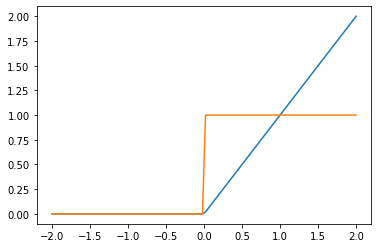

In [102]:
x = np.linspace(-2, 2, 100)
# print(x)

def relu(x):
    return np.maximum(x,0)

def relu_primed(x):
    return np.heaviside(x, 0)

plt.plot(x,np.vectorize(relu)(x))
plt.plot(x,np.vectorize(relu_primed)(x))

We will now define the MLP.
Notice the weights shape.

_Why is it 3 rows for each?_ 

1 element for the bias, and 2 for the features! Look at the diagram

In [104]:
class MLP:
    def __init__(self):
        '''
        Initialise the weights of the network 
        3 layers:
        hidden layer weights: (3,2) shape 
        output weights:       (3,1) shape
        '''
        Glorot_weight_init_scale =  1
        np.random.seed(0)
        self.W1 = np.random.normal(loc=0.0,
                                   scale=Glorot_weight_init_scale,
                                   size=(3,2))
        self.W2 = np.random.normal(loc=0.0,
                                   scale=Glorot_weight_init_scale,
                                   size=(3,1))
    def activation(self,z):
        '''
        Rectified linear unit
        '''
        return np.maximum(z,0)
    

    def forward(self,x):
        '''
        In TF, and most frameworks, the first (or zeroth if you know you know) 
        dimension is the batch dimension 
        
        Suppose we had a SINGLE input, x, of shape (2,). This would 
        require use to inject the addtional batch dimension 
        '''
        if len(x.shape) == 1:
            # testing for existence of batch dimension 
            x = x[np.newaxis,...]

        b1 = np.ones(shape=(x.shape[0], 1))
        x1 = np.hstack((b1,x))
        z1 = x1 @ self.W1
        a1 = self.activation(z1)
        b2 = np.ones(shape=(a1.shape[0], 1))
        z2 = np.hstack((b2,a1))
        h2 = z2 @ self.W2
        # linear activation - same as apply activation(h2) where activation is y = x 
        a3 = h2 
        return z1, a1, z2, a3  

Now we have the MLP defined, lets setup the training routine. We need to fix some learning parameters beforehand:

In [105]:
def plot_weight_convergence(loss_hist, W1_hist, W2_hist):

    plt.figure(figsize=(20, 8))
    ax = plt.subplot(2, 5, 1)
    ax.plot(loss_hist[:])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('Loss', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 2)
    ax.plot(W1_hist[:,0,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$b^{1}_1$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 3)
    ax.plot(W1_hist[:,0,1])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$b^{1}_2$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 4)
    ax.plot(W1_hist[:,1,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{1}_{11}$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 5)
    ax.plot(W1_hist[:,1,1])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{1}_{12}$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 6)
    ax.plot(W1_hist[:,2,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{1}_{21}$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 7)
    ax.plot(W1_hist[:,2,1])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{1}_{22}$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 8)
    ax.plot(W2_hist[:,0,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$b^{2}_{1}$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 9)
    ax.plot(W2_hist[:,1,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{2}_1$', fontsize=14, rotation=0, labelpad=10)
    ax = plt.subplot(2, 5, 10)
    ax.plot(W2_hist[:,2,0])
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('$W^{2}_2$', fontsize=14, rotation=0, labelpad=10)
    plt.tight_layout()
    plt.show()


def trainer(model, LR, MAX_EPOCH):
    loss_hist, W1_hist, W2_hist = [],[],[]
    for epoch in range(MAX_EPOCHS):
        # forward pass
        _ , a2, _, a3 = model.forward(X)

        loss = (1/4) * np.sum((a3 -Y)**2)/len(Y)
        loss_hist.append(loss)

        delta_2 = 0.5 * ( a3 - Y)
        g_prime_1 = np.heaviside(a2, 0)

        # Delta_1 has shape (4, 2)
        delta_1 = delta_2 @ model.W2[1:3, :].T * g_prime_1

        # Biases of layers connecting input and hidden layers
        model.W1[0, :] -= LR * np.sum(delta_1[:, :], axis=0)

        # Weights of layers connecting input and hidden layers 
        model.W1[1:3, :] -= LR * X.T @ delta_1

        # Biases of layers connecting hidden and output layers
        model.W2[0, :] -= LR * np.sum(delta_2[:, :], axis=0)

        # Weights of layers connecting hidden and output layers
        model.W2[1:3, :] -= LR * a2.T @ delta_2
        W1_hist.append(np.copy(model.W1))
        W2_hist.append(np.copy(model.W2))
        
    tot_loss_hist = np.array(loss_hist)
    tot_W1_hist = np.array(W1_hist)
    tot_W2_hist = np.array(W2_hist)
    
    return model, tot_loss_hist, tot_W1_hist, tot_W2_hist

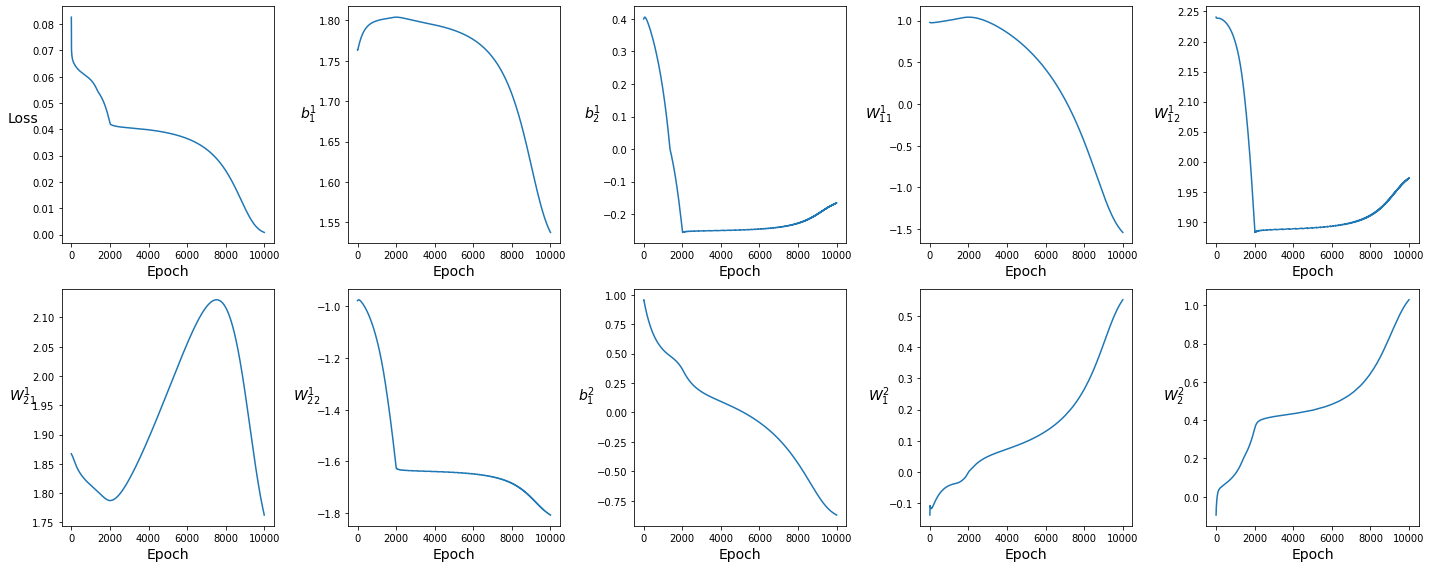

Input matrix:
 [[1 1]
 [1 0]
 [0 1]
 [0 0]]
Target matrix:
 [[0]
 [1]
 [1]
 [0]]
Predictions:
 [[ 0.]
 [ 1.]
 [ 1.]
 [-0.]]


In [106]:
MAX_EPOCHS = 10000
LR = 0.01

model = MLP()
model, loss_hist, W1_hist, W2_hist = trainer(model, LR,MAX_EPOCHS)

plot_weight_convergence(loss_hist, W1_hist, W2_hist)
print("Input matrix:\n", X)
print("Target matrix:\n", Y)
print("Predictions:\n", np.around(model.forward(X)[-1], 0))

Now the trained MLP model is able to model the XOR Gate. 

This motivates the need for **deep** learning; for the situation where a function is known to exhibit non-linear behaviour, i.e. the XOR gate